# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
!pip install numpy==1.21.5

In [2]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

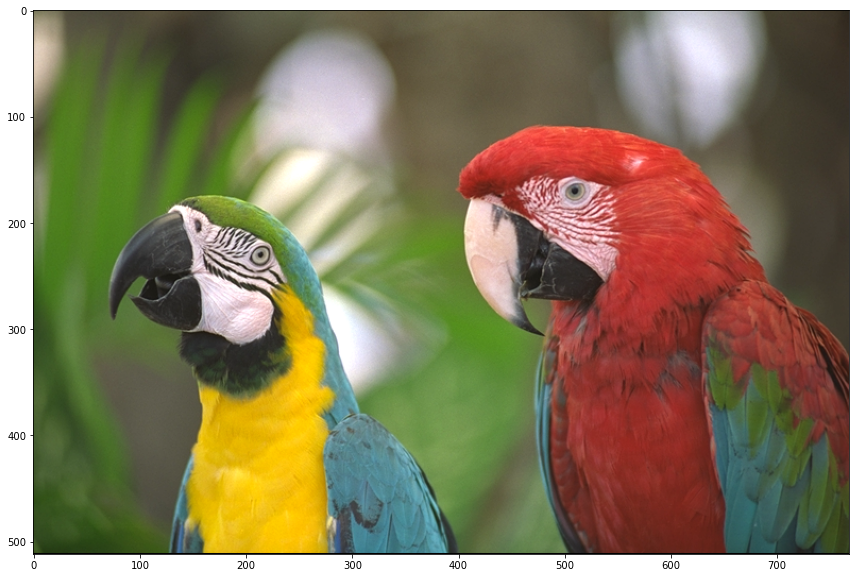

In [3]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [4]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [5]:
# There are some lib implementations, but I decided to implement myself :)
def findDistance(p1, p2):
    return (((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2) + ((p1[2] - p2[2]) ** 2)) ** 0.5 

def find_closest_palette_color(oldpixel, colors):
    distances=[]
    for color in colors:
        distances.append(findDistance(oldpixel,color))
    return colors[np.argmin(distances)]



In [6]:
# Cast the image to float
img = img.astype(np.float32)


# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors)
        # Apply quantization
        quantized[r, c, :] = new_pixel
        

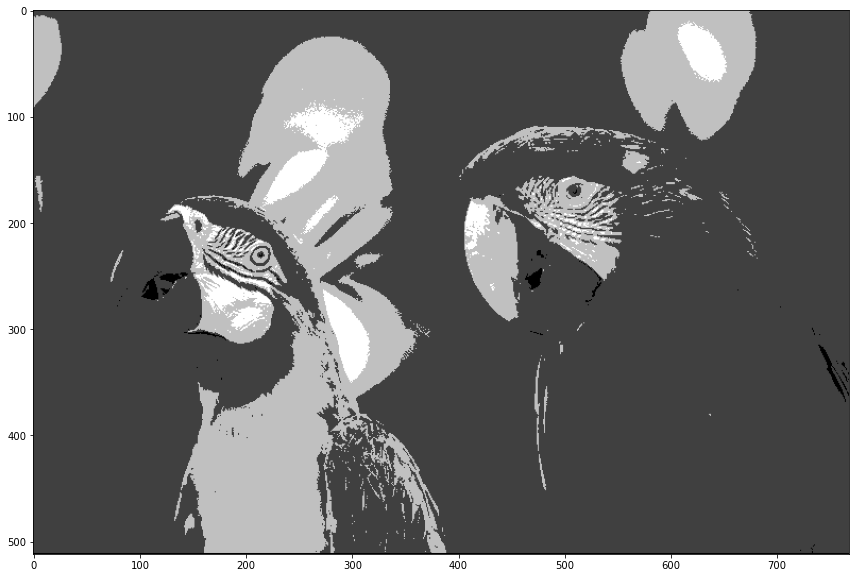

In [7]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.int32))

In [8]:
# Compute average quantization error
error = img.astype(np.float32) - quantized.astype(np.float32)
avg_quant_error = np.average(error)
print('average quant error ', avg_quant_error)




average quant error  9.172205


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [9]:
dithering = np.zeros_like(img)
fs_coeffs = [7.0,3.0,5.0,1.0]

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors)
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        dithering[r+1][c] += quant_error * 7/16
        dithering[r-1][c+1] += quant_error * 3/16
        dithering[r][c+1] += quant_error * 5/16
        dithering[r+1][c+1] += quant_error * 1/16
        dithering[r, c, :] = new_pixel
        
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f900ad03f70>)

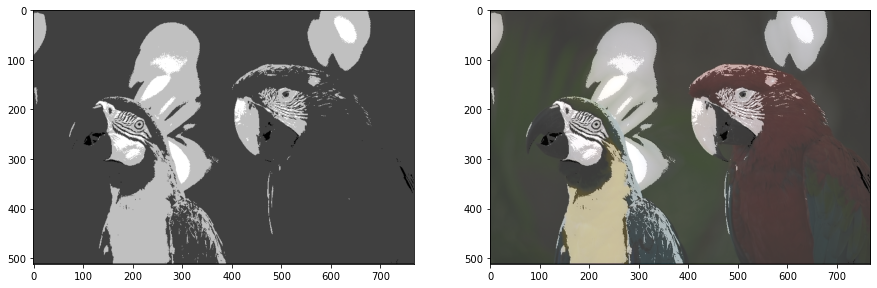

In [10]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.int32))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.int32))   # dithering

In [11]:
# Compute average quantization error for dithered image
error_dithered = img.astype(np.float32) - dithering.astype(np.float32)
avg_quant_error_dithered = np.average(error_dithered)
print('average quant error for dithered image', avg_quant_error_dithered)
print('average quant error ', avg_quant_error)

# Could you please clarify whether I calculated average quantization error correct ?

average quant error for dithered image 7.8137665
average quant error  9.172205


### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
* Which image looks better to you?
* Can you repeat the same process using only two colours: black and white? Show me :-)

### Answers
* Which image has higher quantization error? Optimally quantized or dithered?
    - Optimally quantized has higher quantization error 9.172205 vs 7.8137665
* Which image looks better to you?
    - dithered loks better for me. It has more shadows, not so sharp transisions
* Can you repeat the same process using only two colours: black and white? Show me :-)
    - code is below. The quant error for quantized and dithered images are even bigger
    - the quality of the dithered image is still better, more colors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


average quant error for dithered image 37.713295
average quant error  46.292534


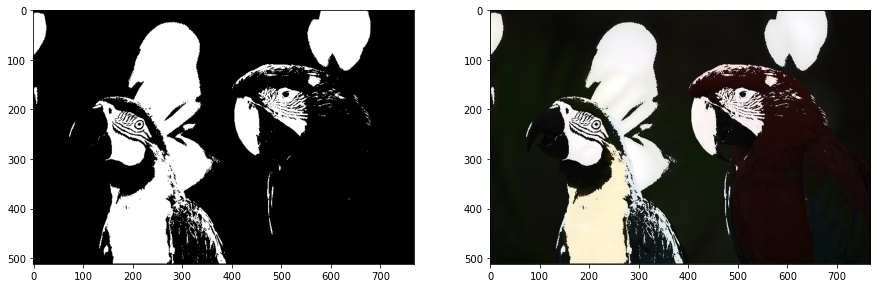

In [12]:
colors_bw = np.array([[0, 0, 0],
                   [255, 255, 255]])
quantized_bw = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors_bw)
        # Apply quantization
        quantized_bw[r, c, :] = new_pixel
        
dithering_bw = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors_bw)
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        dithering_bw[r+1][c] += quant_error * 7/16
        dithering_bw[r-1][c+1] += quant_error * 3/16
        dithering_bw[r][c+1] += quant_error * 5/16
        dithering_bw[r+1][c+1] += quant_error * 1/16
        dithering_bw[r, c, :] = new_pixel
           
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized_bw.astype(np.int32))   # optimally quantized
plt.subplot(122), plt.imshow(dithering_bw.astype(np.int32))   # dithering  

# Compute average quantization error
error = img.astype(np.float32) - quantized_bw.astype(np.float32)
avg_quant_error = np.average(error)

error_dithered = img.astype(np.float32) - dithering_bw.astype(np.float32)
avg_quant_error_dithered = np.average(error_dithered)
print('average quant error for dithered image', avg_quant_error_dithered)
print('average quant error ', avg_quant_error)




for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        diff = colors - pixel        
        diff = np.sum(np.abs(diff), axis=1)
        diff = np.linalg.norm(pixel - colors)
        new_pixel = colors[np.argmin(diff), :]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1] = img_tmp[r, c+1] + 7/16 * quant_error
        img_tmp[r+1, c-1] = img_tmp[r+1, c-1] + 3/16 * quant_error
        img_tmp[r+1, c] = img_tmp[r+1, c] + 5/16 * quant_error
        img_tmp[r+1, c+1] = img_tmp[r+1, c+1] + 1/16 * quant_error        
        
        # Apply dithering
        dithering[r, c] = new_pixel

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors_kmeans = kmeans.cluster_centers_
colors_kmeans

array([[172.65306 ],
       [ 59.060886],
       [107.98452 ],
       [228.86641 ],
       [152.42157 ],
       [  4.462616],
       [ 32.218643],
       [ 84.60532 ],
       [209.35144 ],
       [122.014725],
       [ 71.74874 ],
       [ 96.30002 ],
       [ 45.66171 ],
       [137.24263 ],
       [191.58017 ],
       [249.95807 ]], dtype=float32)

In [14]:
quantized_kmeans = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors_kmeans)
        # Apply quantization
        quantized_kmeans[r, c, :] = new_pixel
        
dithering_kmeans = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors_kmeans)
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        dithering_kmeans[r+1][c] += quant_error * 7/16
        dithering_kmeans[r-1][c+1] += quant_error * 3/16
        dithering_kmeans[r][c+1] += quant_error * 5/16
        dithering_kmeans[r+1][c+1] += quant_error * 1/16
        dithering_kmeans[r, c, :] = new_pixel
           
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized_kmeans.astype(np.int32))   # optimally quantized
plt.subplot(122), plt.imshow(dithering_kmeans.astype(np.int32))   # dithering  

# Compute average quantization error
error = img.astype(np.float32) - quantized_kmeans.astype(np.float32)
avg_quant_error = np.average(error)

error_dithered = img.astype(np.float32) - dithering_kmeans.astype(np.float32)
avg_quant_error_dithered = np.average(error_dithered)
print('average quant error for dithered image', avg_quant_error_dithered)
print('average quant error ', avg_quant_error)

IndexError: index 1 is out of bounds for axis 0 with size 1

Apply FS dithering the same way you did before.
* How does the result look like to you?
* What happens if we use 32 colours?
* And what happens if we use 256 colours?